In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics
import pickle

In [11]:
data = pd.read_csv(R'C:\Users\MOHAMMED HASHID\Downloads\test_scores.csv')
data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [12]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [14]:
print(data.shape)
data.describe()

(2133, 11)


,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


# Exploratory Data Analysis

In [15]:
data.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


Analysis:
Post Test scores have strong positive correlations with Pre Test scores.
Number of students have a slightly strong negative correlations with Test scores.

In [16]:
print(data.groupby("school_type").count()["school"]*100/data.shape[0], "\n\n\n")

school_type
Non-public    25.832161
Public        74.167839
Name: school, dtype: float64 





Analysis

In [17]:


print(data.groupby("school").mean()["posttest"].max())
print(data.groupby("school").mean()["posttest"].min())
print(data.groupby("school").mean()["n_student"].max())
print(data.groupby("school").mean()["n_student"].min())
data.groupby("school").mean()


91.1640625
47.91891891891892
29.307692307692307
15.565217391304348


,n_student,pretest,posttest
school,,,
ANKYI,20.512195,61.341463,71.390244
CCAAW,18.412844,64.623853,78.110092
CIMBB,18.648649,65.067568,76.945946
CUQAM,26.850467,53.925234,65.560748
DNQDD,24.934426,54.327869,66.565574
FBUMG,15.565217,62.891304,78.608696
GJJHK,23.932203,53.194915,65.025424
GOKXL,21.468750,50.796875,64.953125
GOOBU,26.569620,38.196203,49.613924


**Analysis:**  
UKPGS has the highest mean score (91.16).  
KZKKE has the lowest mean score (47.92).  
ZOWMK has the highest mean number of students per classroom (29.31).  
FBUMG has the lowest mean number of students per classroom (15.57).  


In [18]:
data.groupby("school").describe()["posttest"]

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
ANKYI,41.0,71.390244,3.955237,63.0,69.00,71.0,74.00,79.0
CCAAW,109.0,78.110092,5.189625,67.0,74.00,78.0,82.00,91.0
CIMBB,74.0,76.945946,5.556415,64.0,73.25,78.0,80.75,88.0
CUQAM,107.0,65.560748,4.459837,56.0,62.50,65.0,69.00,76.0
DNQDD,122.0,66.565574,6.535330,49.0,62.00,67.0,71.75,79.0
FBUMG,46.0,78.608696,4.772506,68.0,76.00,79.0,82.00,88.0
GJJHK,118.0,65.025424,8.807982,49.0,59.00,63.0,71.50,85.0
GOKXL,64.0,64.953125,8.046353,48.0,57.00,68.5,71.00,77.0
GOOBU,158.0,49.613924,6.627221,32.0,44.00,50.0,55.00,64.0


**Analysis**  
The best performing student(s) is/are from IDGFP.  
The worst performing student(s) is/are from GOOBU.  

In [19]:
data.groupby("school").describe()["pretest"]

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
ANKYI,41.0,61.341463,3.038172,54.0,60.00,61.0,64.00,67.0
CCAAW,109.0,64.623853,6.232812,48.0,61.00,65.0,68.00,78.0
CIMBB,74.0,65.067568,4.705960,54.0,62.00,65.5,68.75,73.0
CUQAM,107.0,53.925234,3.656736,44.0,52.00,53.0,56.50,61.0
DNQDD,122.0,54.327869,6.935884,36.0,50.25,55.5,60.00,67.0
FBUMG,46.0,62.891304,4.872728,53.0,58.25,63.5,66.00,73.0
GJJHK,118.0,53.194915,7.219701,38.0,47.00,53.5,59.00,68.0
GOKXL,64.0,50.796875,6.071478,36.0,45.75,52.0,55.00,61.0
GOOBU,158.0,38.196203,6.142116,23.0,33.25,38.0,42.00,55.0


<AxesSubplot:title={'center':'Lunch'}, ylabel='school'>

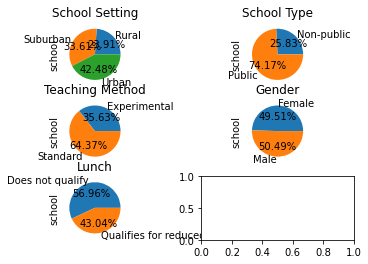

In [72]:
fig,a= plt.subplots(3,2)
data.groupby("school_setting").count()["school"].plot(kind="pie", ax=a[0][0], title="School Setting", autopct='%1.2f%%')
data.groupby("school_type").count()["school"].plot(kind="pie", ax=a[0][1], title="School Type", autopct='%1.2f%%')
data.groupby("teaching_method").count()["school"].plot(kind="pie", ax=a[1][0], title="Teaching Method", autopct='%1.2f%%')
data.groupby("gender").count()["school"].plot(kind="pie", ax=a[1][1], title="Gender", autopct='%1.2f%%')
data.groupby("lunch").count()["school"].plot(kind="pie", ax=a[2][0], title="Lunch", autopct='%1.2f%%')


**Analysis**  
More students are from urban school settings than any other. Rural settings have the least number of students.  
More students are from public schools than Non-public with public schools having about 3 times more than the population of non-public students that took the test.  
Most classes/schools follow standard teaching methods as opposed to experimental methods.  
The proportion of male and female test takers are almost the same.  
Most students don't qualify for lunch.  

<AxesSubplot:>

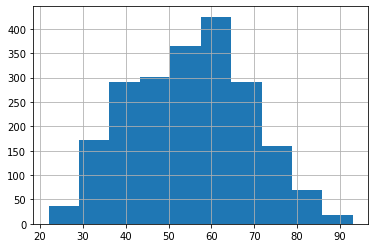

In [21]:
data["pretest"].hist(bins=10)

<AxesSubplot:>

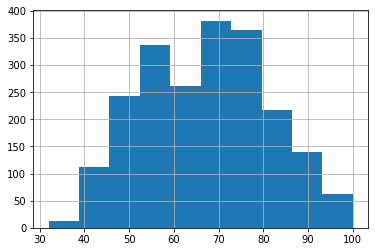

In [22]:
data["posttest"].hist(bins=10)

**Analysis**  
The students performed better in post tests than the pre tests with no student scoring below 30 in the post test.

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

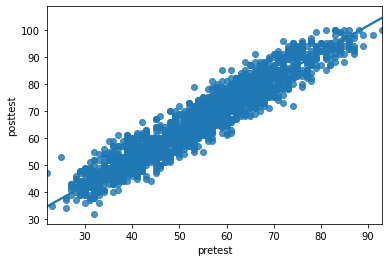

In [23]:
sns.regplot(x="pretest", y="posttest", data=data)

<AxesSubplot:xlabel='n_student', ylabel='posttest'>

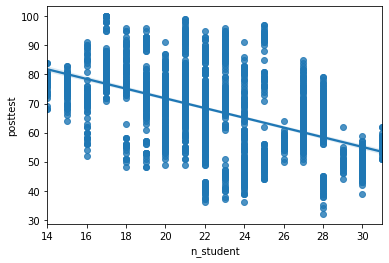

In [24]:
sns.regplot(x="n_student", y="posttest", data=data)

F_onewayResult(statistic=284.64490998276796, pvalue=2.7767850260221484e-110)

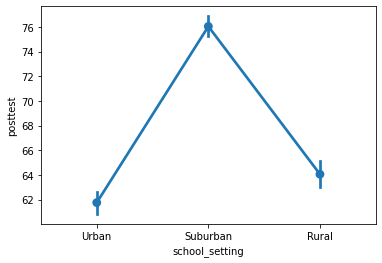

In [25]:

sns.pointplot(x="school_setting", y="posttest", data=data)
stats.f_oneway(data[data['school_setting'] == 'Urban' ]["posttest"], data[data['school_setting'] == 'Suburban' ]["posttest"],
              data[data['school_setting'] == 'Rural' ]["posttest"])

**Analysis**  
The school setting significantly affects the score of students with suburban students having the best scores and urban having the worst.

F_onewayResult(statistic=346.3698207318108, pvalue=9.375658077323967e-72)

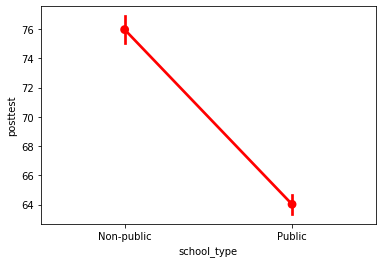

In [26]:
sns.pointplot(x="school_type", y="posttest", data=data, color='r')
stats.f_oneway(data[data['school_type'] == 'Public' ]["posttest"],
              data[data['school_type'] == 'Non-public' ]["posttest"])

**Analysis**  
School type significantly affects the test scores of the students with public school students performing the worst.

F_onewayResult(statistic=231.25681659751112, pvalue=1.1640893397300103e-49)

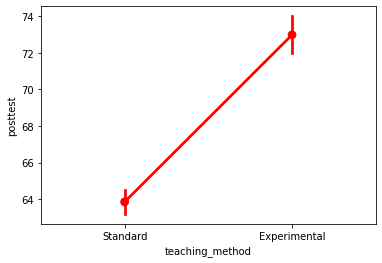

In [27]:
sns.pointplot(x="teaching_method", y="posttest", data=data, color='r')
stats.f_oneway(data[data['teaching_method'] == 'Standard' ]["posttest"],
              data[data['teaching_method'] == 'Experimental' ]["posttest"])

**Analysis**  
Teaching methods significantly affects the test scores of the students. Students taught using experimental methods performed better on average.

F_onewayResult(statistic=0.10151953331754493, pvalue=0.7500449231811932)

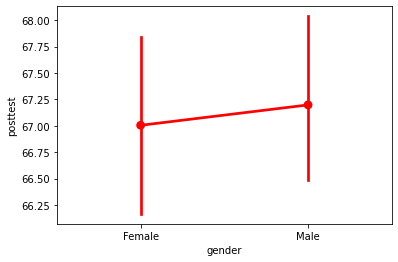

In [28]:
sns.pointplot(x="gender", y="posttest", data=data, color='r')
stats.f_oneway(data[data['gender'] == 'Female' ]["posttest"], 
               data[data['gender'] == 'Male' ]["posttest"])

**Analysis**  
Gender is not a significant factor affecting the scores of student. The average scores of both genders are almost the same.

F_onewayResult(statistic=1188.5615435419354, pvalue=2.2616015547519054e-207)

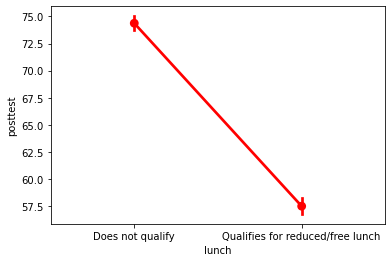

In [29]:
sns.pointplot(x="lunch", y="posttest", data=data, color='r')
stats.f_oneway(data[data['lunch'] == 'Does not qualify' ]["posttest"], 
               data[data['lunch'] == 'Qualifies for reduced/free lunch' ]["posttest"])

**Analysis**  
Lunch significantly affects the test scores of the students. Students that did not qualify for lunch  performed better on average.

In [30]:
abv_avg = data[data["posttest"]>data["posttest"].mean()]
bel_avg = data[data["posttest"]<=data["posttest"].mean()]

In [31]:
print(abv_avg.groupby('school').count()['lunch'])
bel_avg.groupby('school').count()['lunch']

school
ANKYI     33
CCAAW    108
CIMBB     69
CUQAM     37
DNQDD     58
FBUMG     46
GJJHK     39
GOKXL     37
IDGFP     94
LAYPA     52
OJOBU     46
QOQTS     44
UAGPU     69
UKPGS    128
UUUQX     82
VHDHF     30
VKWQH     40
ZMNYA     68
Name: lunch, dtype: int64


school
ANKYI      8
CCAAW      1
CIMBB      5
CUQAM     70
DNQDD     64
GJJHK     79
GOKXL     27
GOOBU    158
KFZMY     52
KZKKE    111
LAYPA      5
OJOBU     35
QOQTS    105
UAGPU     18
UUUQX      2
VHDHF     21
VKWQH     60
VVTVA    114
ZMNYA      1
ZOWMK    117
Name: lunch, dtype: int64

**Analysis**
CCAAW, IDGFP and UKPGS have the most students performing above average.  
UKPGS and IDGFP students all performed above average with CCAAW have a student performing below average.  
  
On the lower end, GOOBU, QOQTS, VVTVA, and ZOWMK have the most students performing below average

In [32]:
print(data[data["school"]=="UKPGS"].shape[0])
print(data[data["school"]=="UKPGS"].describe())

128
        n_student     pretest    posttest
count  128.000000  128.000000  128.000000
mean    21.593750   78.453125   91.164062
std      2.359225    5.152569    3.415521
min     18.000000   67.000000   82.000000
25%     19.000000   75.000000   89.000000
50%     22.000000   78.000000   91.000000
75%     23.000000   82.250000   93.000000
max     25.000000   91.000000   99.000000


In [33]:
data[data["posttest"]>99]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
902,IDGFP,Urban,Non-public,P2A,Experimental,17.0,BYVSP,Male,Does not qualify,86.0,100.0
903,IDGFP,Urban,Non-public,P2A,Experimental,17.0,D9SR6,Female,Does not qualify,83.0,100.0
905,IDGFP,Urban,Non-public,P2A,Experimental,17.0,K5955,Male,Does not qualify,85.0,100.0
907,IDGFP,Urban,Non-public,P2A,Experimental,17.0,P32P9,Male,Does not qualify,83.0,100.0
908,IDGFP,Urban,Non-public,P2A,Experimental,17.0,QXTHU,Male,Does not qualify,93.0,100.0
909,IDGFP,Urban,Non-public,P2A,Experimental,17.0,RG9R4,Male,Does not qualify,83.0,100.0
911,IDGFP,Urban,Non-public,P2A,Experimental,17.0,SH2DM,Male,Does not qualify,88.0,100.0
915,IDGFP,Urban,Non-public,P2A,Experimental,17.0,W4KYQ,Female,Does not qualify,81.0,100.0


**Analysis**  
Every student that score 100 in post tests where from IDGFP, class P2A, mostly males, did not qualify for lunch and where taught with experimental methods

In [34]:
data[data["school"]=="IDGFP"].describe()

,n_student,pretest,posttest
count,94.000000,94.000000,94.000000
mean,19.063830,75.202128,87.223404
std,2.285101,6.024287,7.447529
min,17.000000,63.000000,74.000000
25%,17.000000,71.000000,81.000000
50%,17.000000,74.000000,86.000000
75%,21.000000,78.000000,93.750000
max,22.000000,93.000000,100.000000


In [35]:
lowests = data[data["posttest"]<56] # 25%
print(lowests.groupby("school_setting")["n_student"].count(), "\n\n")
print(lowests.groupby("teaching_method")["n_student"].count(), "\n\n")
print(lowests.groupby("school")["n_student"].count(), "\n\n")
print(lowests.groupby("lunch")["n_student"].count(), "\n\n")
print(lowests.groupby("gender")["n_student"].count(), "\n\n")
print(lowests.groupby("school_type")["n_student"].count(), "\n\n")

school_setting
Rural       124
Suburban     22
Urban       360
Name: n_student, dtype: int64 


teaching_method
Experimental    111
Standard        395
Name: n_student, dtype: int64 


school
DNQDD      6
GJJHK     16
GOKXL     12
GOOBU    124
KFZMY     29
KZKKE     89
OJOBU      5
QOQTS      5
VHDHF      2
VKWQH     16
VVTVA    112
ZOWMK     90
Name: n_student, dtype: int64 


lunch
Does not qualify                     44
Qualifies for reduced/free lunch    462
Name: n_student, dtype: int64 


gender
Female    258
Male      248
Name: n_student, dtype: int64 


school_type
Non-public     31
Public        475
Name: n_student, dtype: int64 




**Analysis**  
Among the students scoring in the bottom 25%:  
They were mostly urban and rural students.  
They were mostly taught using standard methods.  
They mostly qualified for reduced/free lunch.  
There was no significant difference in gender proportion.
They were almost all from public school.

In [36]:
s5 = data[data["posttest"]>77] #75%

In [37]:
print(s5.shape)

(531, 11)


In [38]:
s5.groupby('school').count()["classroom"]

school
ANKYI      2
CCAAW     58
CIMBB     41
DNQDD      3
FBUMG     28
GJJHK     16
IDGFP     86
LAYPA     16
OJOBU     12
QOQTS     14
UAGPU     14
UKPGS    128
UUUQX     53
VKWQH     12
ZMNYA     48
Name: classroom, dtype: int64

In [39]:
s5.groupby('teaching_method').count()["classroom"]

teaching_method
Experimental    322
Standard        209
Name: classroom, dtype: int64

Top students were mostly taught using experimental methods.

In [40]:
s5.groupby('school_type').count()["classroom"]

school_type
Non-public    268
Public        263
Name: classroom, dtype: int64

There were no significant differences in the school type among the top students.

In [41]:
s5.groupby('school_setting').count()["classroom"]

school_setting
Rural        68
Suburban    320
Urban       143
Name: classroom, dtype: int64

Suburban students were the most and rural student were the least

In [42]:
s5.groupby('lunch').count()["classroom"]

lunch
Does not qualify                    489
Qualifies for reduced/free lunch     42
Name: classroom, dtype: int64

# Feature Engineering, Data Preparation And Model training

In [43]:
data2 = data.copy()
fields = ["school", "school_setting", "school_type", "teaching_method", "n_student", "lunch"]

In [44]:
from sklearn.preprocessing import LabelEncoder
for i in fields:
    enc = LabelEncoder()
    data2[i] = enc.fit_transform(data2[i])

In [45]:
data2 = data2.drop(columns=["classroom", "student_id", "gender"])

**Drop columns that are not needed.**

In [46]:
data2

,school,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,0,2,0,1,6,0,62.0,72.0
1,0,2,0,1,6,0,66.0,79.0
2,0,2,0,1,6,0,64.0,76.0
3,0,2,0,1,6,0,61.0,77.0
4,0,2,0,1,6,0,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,22,2,1,1,16,0,39.0,55.0
2129,22,2,1,1,16,1,38.0,46.0
2130,22,2,1,1,16,1,45.0,51.0
2131,22,2,1,1,16,1,46.0,53.0


In [47]:
Y = data2["posttest"]

In [48]:
X = data2.drop(columns=["posttest"])

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=39)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVR(gamma="scale")
svc = GridSearchCV(svc, parameters, cv=5)
svc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [50]:
svc.score(X_test, Y_test)

0.9400239556037949

In [51]:
mlp = MLPRegressor()
mlp.fit(X_train, Y_train)

C:\Users\MOHAMMED HASHID\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [52]:
mlp.score(X_test, Y_test)

0.9280475454889318

In [53]:
rfr = RandomForestRegressor(n_estimators=25)
rfr.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25)

In [54]:
rfr.score(X_test, Y_test)

0.9397243704145343

In [55]:
lr = LogisticRegression(solver="liblinear", multi_class="ovr", penalty='l2', C=10)
lr.fit(X_train, Y_train)

LogisticRegression(C=10, multi_class='ovr', solver='liblinear')

In [56]:
lr.score(X_test, Y_test)

0.06741573033707865

In [57]:
xtr = ExtraTreesRegressor(n_estimators=20)
xtr.fit(X_train, Y_train)

ExtraTreesRegressor(n_estimators=20)

In [58]:
xtr.score(X_test, Y_test)

0.9309465055167656

In [59]:
abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=300, random_state=754)
abr.fit(X_train, Y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                  n_estimators=300, random_state=754)

In [60]:
abr.score(X_test, Y_test)

0.9394916391278999

In [61]:
gbr = GradientBoostingRegressor(random_state=1455, n_estimators=15)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=15, random_state=1455)

In [62]:
gbr.score(X_test, Y_test)

0.8935115329595809

In [63]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)


LinearRegression()

In [64]:
lreg.score(X_test, Y_test)

0.9401014319648658

# Conclusion
Logistic Regression gives the best accuracy.

In [65]:
print('MAE:', metrics.mean_absolute_error(Y_test, lreg.predict(X_test)))
print('MSE:', metrics.mean_squared_error(Y_test, lreg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, lreg.predict(X_test))))
print('R^2:', metrics.r2_score(Y_test, svc.predict(X_test)))

MAE: 2.622832212470867
MSE: 11.07773556292864
RMSE: 3.328323235944586
R^2: 0.9400239556037949
